In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
birddata = pd.read_csv('bird_tracking.csv')

In [2]:
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))
birddata['timestamp'] = pd.Series(timestamps, index = birddata.index)
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [3]:
data = birddata[birddata.bird_name == 'Eric']
data

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42
...,...,...,...,...,...,...,...,...,...,...
19790,19790,12,2014-04-30 21:51:26+00,851,120.619823,51.322966,3.216576,0.064031,Eric,2014-04-30 21:51:26
19791,19791,34,2014-04-30 22:21:33+00,851,35.683036,51.323116,3.216659,1.942395,Eric,2014-04-30 22:21:33
19792,19792,1,2014-04-30 22:51:41+00,851,-52.808233,51.322979,3.216463,1.678392,Eric,2014-04-30 22:51:41
19793,19793,7,2014-04-30 23:21:34+00,851,-38.675683,51.322986,3.216340,0.208087,Eric,2014-04-30 23:21:34


In [4]:
times = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time)/ datetime.timedelta (days = 1)
elapsed_days

array([0.0, 0.02082175925925926, 0.04155092592592593, ...,
       258.9399652777778, 258.9607175925926, 258.9814930555556],
      dtype=object)

In [5]:
for (i,t) in enumerate(elapsed_days):
    print('index is: ' + str(i) + ' time is: ' + str(t))

e is: 249.08027777777778
index is: 19333 time is: 249.1013773148148
index is: 19334 time is: 249.12219907407408
index is: 19335 time is: 249.1429398148148
index is: 19336 time is: 249.16385416666665
index is: 19337 time is: 249.18592592592591
index is: 19338 time is: 249.20664351851852
index is: 19339 time is: 249.2277662037037
index is: 19340 time is: 249.24847222222223
index is: 19341 time is: 249.26922453703705
index is: 19342 time is: 249.29133101851852
index is: 19343 time is: 249.3134837962963
index is: 19344 time is: 249.3346527777778
index is: 19345 time is: 249.35555555555555
index is: 19346 time is: 249.37636574074074
index is: 19347 time is: 249.3972222222222
index is: 19348 time is: 249.4179513888889
index is: 19349 time is: 249.43923611111111
index is: 19350 time is: 249.45997685185185
index is: 19351 time is: 249.48070601851853
index is: 19352 time is: 249.50166666666667
index is: 19353 time is: 249.5223726851852
index is: 19354 time is: 249.54328703703703
index is: 19355

In [7]:
next_day = 1
inds = []
daily_mean_speed = []
#tuple of index and time
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        #compute mean speed
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []
print('the days are: ', len(daily_mean_speed))
print('the speed per day is:', daily_mean_speed)

the days are:  258
the speed per day is: [2.121516513619244, 2.6191052366952796, 1.7863149983905395, 2.9454235893858662, 2.4762427460803886, 1.8477070902332324, 2.560404356375535, 1.482814303345286, 1.6162885950348576, 1.5220367121305791, 2.028393720085181, 1.7402841957023534, 1.5411246572674582, 2.1105160349071914, 2.0219116434979787, 2.6897713619857324, 2.351241357863497, 2.659076347659485, 2.9416171622419505, 1.898409764788526, 2.3327509804317934, 1.6072552805767766, 1.7682757593059097, 2.9943046312787565, 1.9085264007103804, 1.3634392809056228, 2.02224772742323, 2.72254039303825, 2.269189387498984, 2.0142790500748506, 2.822659710423693, 2.004075379375076, 1.7669075779904866, 1.9567174870023374, 1.6085815765274403, 2.1039007148615303, 2.0923230222020206, 2.0779645085088836, 1.7590805790548523, 2.5642674569001462, 2.0224097745761993, 2.524284916466437, 2.33621733355763, 2.1500196892882166, 1.6971102860729534, 3.175848894110063, 2.3345096275728086, 2.440327594446141, 1.854540852598338

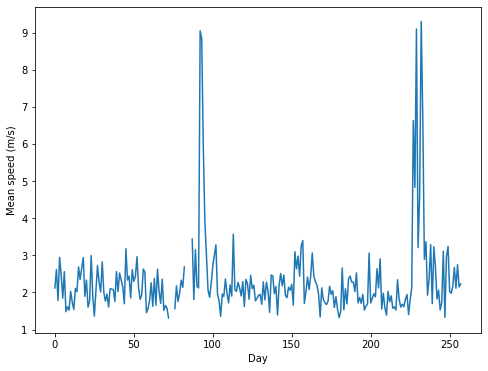

In [8]:
plt.figure(figsize = (8,6))
plt.plot(daily_mean_speed)
plt.xlabel('Day')
plt.ylabel('Mean speed (m/s)')
plt.show()